> 本节课学习均方误差损失函数和梯度下降算法的具体实现，并介绍了机器学习中损失函数、梯度下降、前向传播和反向传播的概念。

第一节课介绍了学习机器学习的模型、参数、特征、标签、超参数的概念，并使用线性误差实现最基础的机器学习。但线性误差存在一些不足，正常情况下误差e为0代表预测值和实际值一至，误差值越大代表代表预测值和实际值的差距越大，但线性误差的值有正负之分，为了让误差始终为正数，我们引入**均方误差**，均方误差在计算时将误差平方，可以惩罚误差较大的数据点，因此相对于绝对值误差对误差的敏感度更高，能更精确地评估模型的预测效果。此外，均方误差具有平滑、可导、易于处理等特点，在机器学习中广泛被使用。

## 数学基础

均方误差需要掌握一元二次函数，梯度下降需要熟悉导数和偏导数的运算。

### 一元二次函数

一元二次函数是指形如$y = ax^2 + bx + c$ 的函数，其中a，b，c是实数，x是自变量，y是因变量。这种函数的图像是一个开口向上或开口向下的抛物线。其中，a控制抛物线的开口大小，正数表示开口向上，负数表示开口向下；b控制抛物线在x方向的位置；c控制抛物线在y方向的位置。它在代表着一些重要的几何、物理和经济概念，诸如物体的位移、高度、速度、加速度等。

一元二次函数的定点公式是指，对于一元二次函数$f(x)=ax^2+bx+c$，它与$x$轴的交点即为它的零点，其中$x_{1,2}$分别是函数图像与$x$轴的交点，则有以下定点公式：

- 函数的零点公式：$x_{1,2}=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$。
- 函数的顶点公式：函数的顶点坐标为$(\frac{-b}{2a}, \frac{4ac-b^2}{4a})$，其中顶点横坐标是$x=-\frac{b}{2a}$，纵坐标可以使用这个公式：$f(\frac{-b}{2a})=a\cdot(\frac{-b}{2a})^2+b\cdot(\frac{-b}{2a})+c$。


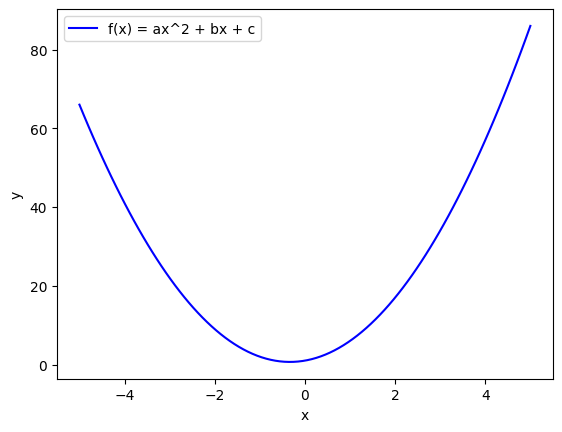

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x, a, b, c):
    return a * x**2 + b * x + c

# 定义a，b，c的值
a = 3    
b = 2
c = 1

x = np.linspace(-5, 5, 100)    # 定义x范围和精度
y = f(x, a, b, c)              # 计算y

# 绘制图像
plt.plot(x, y, 'b-', label='f(x) = ax^2 + bx + c')
plt.xlabel('x')               # x轴标签
plt.ylabel('y')               # y轴标签
plt.legend()                  # 显示图例
plt.show()                    # 显示图像

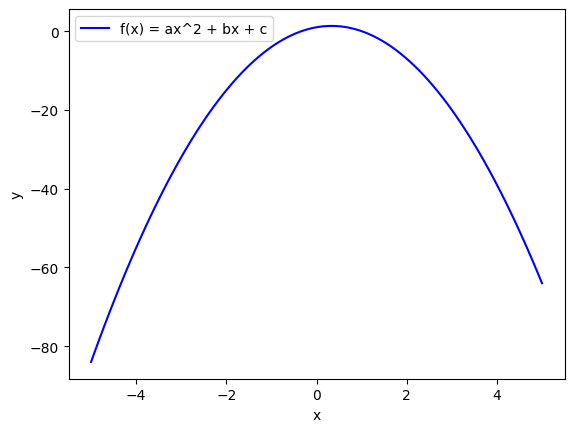

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x, a, b, c):
    return a * x**2 + b * x + c

# 定义a，b，c的值
a = -3    
b = 2
c = 1

x = np.linspace(-5, 5, 100)    # 定义x范围和精度
y = f(x, a, b, c)              # 计算y

# 绘制图像
plt.plot(x, y, 'b-', label='f(x) = ax^2 + bx + c')
plt.xlabel('x')               # x轴标签
plt.ylabel('y')               # y轴标签
plt.legend()                  # 显示图例
plt.show()                    # 显示图像

在机器学习中均方误差损失函数就是使用一元二次函数的特性。

### 导数

导数的定义是一个函数在某个点处的变化率，即该点的斜率。它是函数f(x)在x点处的极限值，通常表示为f'(x)或 dy/dx。在数学上，导数定义为函数f(x)在其自变量x处的极限：

$$f'(x) = \lim _{\Delta x\rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}$$

> 求导法则

1. 常数法则：常数的导数为0。
2. 变量求导法则：对于自变量x，其导数为1。
3. 幂函数求导法则：对于函数$ f(x)=x^n $，其导数为$ f'(x)=nx^{n-1} $。
4. 指数函数求导法则：对于函数$ f(x)=a^x $，其导数为$ f'(x)=a^xlna $。
5. 对数函数求导法则：对于函数$ f(x)=lnx $，其导数为$ f'(x)=\frac{1}{x} $。
6. 加法法则：$(f(x)+g(x))' = f'(x) + g'(x)$。
7. 减法法则：$(f(x)-g(x))' = f'(x) - g'(x)$。
8. 乘法法则：$(f(x)g(x))' = f'(x)g(x) + f(x)g'(x)$。
9. 除法法则：$\left(\frac{f(x)}{g(x)}\right)' = \frac{f'(x)g(x) - f(x)g'(x)}{g^2(x)}$
10. 链式法则：对于两个函数f和g的复合函数f(g(x))，其导数为$ (f(g(x)))'=f'(g(x))\cdot g'(x) $，如$y=(a-x)^2$的导数：$y'=2(a-x)\cdot (a-x)'=2(a-x)(-1)=-2(a-x)$。

> 偏导数

偏导数是指多元函数中，对某一个自变量求导时，将其他自变量看做常数的导数。其定义如下：

对于一个n元函数f(x1, x2, ..., xn)，它在点(x1, x2, ..., xn)处对第i个自变量的偏导数为：

$$\frac{∂f}{∂x_i} = \lim_{Δx_i→0}\frac{f(x_1, x_2, ..., x_i+Δx_i, ..., x_n) - f(x_1, x_2, ..., x_i, ..., x_n)}{Δx_i}$$

在机器学习中，导数是梯度下降法中用于计算梯度的基础概念。梯度是函数对每个变量的偏导数构成的向量。在机器学习中，我们通常使用梯度下降法来进行优化，即通过计算损失函数相对于各个参数的导数（梯度），不断地调整参数的值，直到损失函数最小化或收敛。


## 机器学习基础

在第一节课的机器学习中，最核心的公式是$w = w + \alpha * e * x$，误差$e=y-y_{pre}$，这个误差叫**线性误差**，正常理解中我们需要误差越小越好，但线性误差这种形式可能会使得误差计算结果出现负值，而负值是没有意义的，因为预测结果不能比实际结果更差。

在机器学习中更常用的是**均方误差**，均方误差的优点是确保误差始终为正数，且越大的误差被惩罚得越严厉，在某些场景下能够更好地体现预测结果的差异性。

对单个样本的误差平方为$e=(y - y_{pre})^2$，而把所有$n$个样本的误差平方求和然后取平均值，就是均方误差。数学上，假设我们有 $n$ 个数据样本，第 $i$ 个样本的真实值为 $y_i$，模型给出的预测值为 $\hat{y_i}$，则均方误差可表示为：

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

其中，$n$ 表示样本数量，$y_i$ 表示第 $i$ 个样本的真实值，$\hat{y_i}$ 表示第 $i$ 个样本的预测值，$\sum$ 表示对于所有样本求和的操作。

但是使用均方误差怎么自动调整权重参数w实现机器学习呢？

我们先研究一下单个样本$e_i=(y_i-wx_i)^2$：

$$e_i=x_i^2w^2-2x_iy_iw+y_i^2$$

把以上函数用一元二次方程$e=ax^2+bx+c$的关系代入，找出$e$和$w$的关系：

$$e=aw^2+bw+c$$

其中：$a_i=x_i^2$，$b_i=-2x_iy_i$，$c_i=y_i^2$；

$e$和$w$的关系就是一个一个开口向上的抛物线，根据顶点公式，还可以直接得到误差最小点的$w_i=-\frac{b_i}{2a_i}=-\frac{-2x_iy_i}{2x_i^2}=\frac{x_iy_i}{x_i^2}=\frac{y_i}{x_i}$

而对均方误差，则有：

$$e=\frac{1}{m}\sum_{i\to0}^m(x_i^2w^2-2x_iy_iw+y_i^2)$$
$$e=\frac{1}{m}\sum_{i\to0}^mx_i^2w^2+\frac{1}{m}\sum_{i\to0}^m(-2x_iy_i)w+\frac{1}{m}\sum_{i\to0}^my_i^2$$

可以得到：$a=\frac{1}{m}\sum_{i\to0}^mx_i^2$，$b=\frac{1}{m}\sum_{i\to0}^m(-2x_iy_i)$，$c=\frac{1}{m}\sum_{i\to0}^my_i^2$；顶点$w=-\frac{b}{2a}=-\frac{\frac{1}{m}\sum_{i\to0}^m(-2x_iy_i)}{2\frac{1}{m}\sum_{i\to0}^mx_i^2}=\frac{\sum_{i\to0}^m(x_iy_i)}{\sum_{i\to0}^mx_i^2}$

均方误差（Mean Squared Error, MSE）是衡量模型预测值与真实值误差的一种常用指标。在机器学习中，MSE通常用于回归问题中，其计算方式是将每个样本预测值与真实值之差的平方求和，再取平均值。MSE越小，表示模型的预测结果越接近真实值。所以MSE也常作为优化目标或损失函数，例如在线性回归、逻辑回归等模型中，通常以最小化MSE为目标进行模型的参数优化。

除了均方误差MSE，这里继续补充一些机器学习相关的重要概念：

### 损失函数

损失函数（loss function）是指衡量模型预测值和真实值之间差异的函数。在机器学习中，我们的目标是训练一个模型来自动从数据中学习经验，并预测新的未知数据的标签或目标值。而损失函数就是用来衡量模型预测值与真实值差异的，其越小表示模型预测值与真实值差异越小，模型也就越接近真实值。

在具体应用中，损失函数的选择通常取决于问题的类型和需求，比如分类问题常用的交叉熵损失函数（cross-entropy）与平方损失函数（squared loss），回归问题常用的均方误差损失函数（mean square error）和L1损失函数（L1 loss）等。

### 梯度下降

梯度是一个向量，它由函数对各个自变量求偏导数得到。梯度可以指示函数在某个点的变化方向。如果梯度的模长很大，则表明函数在该点的变化幅度也很大，此时可以考虑沿着梯度方向进行参数更新，如此一来就可以使函数值逐渐下降，直到找到函数的最小值为止。梯度下降的基本思想是：根据函数的负梯度方向来更新参数，使函数的取值沿着梯度方向下降。梯度下降是机器学习中最基本、最常用的优化算法之一，它通过不断迭代和更新模型的参数，使损失函数的值逐渐下降，从而得到最优的模型参数。

> 这里说的很抽象，不理解没关系，后面会结合代码具体讲解。

### 前向传播

前向传播（Forward Propagation）是神经网络中的一种重要计算过程，它是从输入层开始，按照网络结构顺序不断计算每个神经元的输出值，并将它们传递给下一层神经元的过程。前向传播是神经网络中至关重要的一步，通过输入数据和参数，构造出各层神经元之间的信息传递关系，计算出模型的预测输出，并得到损失函数的值。

简单的说，以第一课中的模型$y=wx$为例，根据输入$x$求输出$y$并计算损失函数的值的过程就是前向传播。

### 反向传播

反向传播（Backpropagation）是神经网络中的一种基本算法，主要用来训练深度神经网络。它的主要思想是，通过计算输出层与目标之间的误差，然后反向传播该误差，逐层更新权重和偏置，实现训练过程。前向传播是反向传播算法的基础，反向传播算法可以利用前向传播过程中记录的信息，计算出每个神经元的导数，进而得到每个参数的梯度，更新神经网络参数，实现模型训练。

反向传播算法的过程可以分为以下几步：

1. 前向传播：将输入数据传送进网络，经过多层的非线性变换，计算出网络的输出结果。
2. 计算误差：将网络的输出结果与目标值进行比较，计算出误差。
3. 反向传播误差：从输出层开始，将误差反向传播回每一层，计算每个神经元的迟滞对前一层神经元的净输入值的偏导数，并利用链式规则将误差分摊到每个参数上。
4. 更新权重：根据反向传播得到的参数的梯度，使用梯度下降等优化方法，更新神经元之间的权重，以使模型的损失函数逐渐减小。

简单的说，以第一课中的模型$y=wx$为例，得到损失函数的值$e$后，反过来根据误差$e$更新参数$w$的过程就是反向传播。只不过实际神经网络中的反向传播是基于求导的链式法则”（differentiation of composite functions）来计算每一层的梯度更新参数。

## 解析计算

现在我们先不用机器学习，直接用计算的方式根据前面的公式求解试试，我们分析了e和w的关系，发现是个开口向上的一元二次函数后，可以根据顶点公式直接得到w的值，用numpy就是`w_min = np.sum(X * Y) / np.sum(X * X)`：


w_min = 3.0


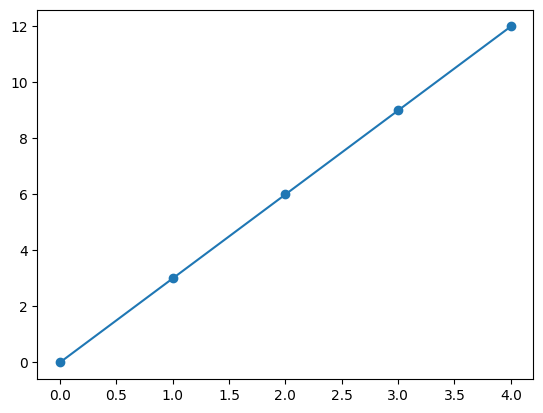

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 求顶点(抛物线顶点公式)
w_min = np.sum(X * Y) / np.sum(X * X)
print("w_min =", w_min)

y_pre = w_min * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

和第一节课一样，计算可以得到精确值，只是这里直接使用顶点坐标公式得到$w$，但这解决不了数据量非常大或数据一直在更新的情况下的复杂问题。

## 机器学习

换一个思路，看看学习应该怎么做

<div class="alert alert-success">
<h3>梯度下降算法</h3>
<p>对$e=aw^2+bw+c$这个一元二次函数来说，误差最小的地方是抛物线的最低点（顶点），但怎么让w到达顶点呢？从抛物线的特性上可以利用斜率$k$来收敛$w$，类似第一节课中的$w=w-aex$，我们可以使用$w=w-ak$来调整$w$，$a$为学习率，$k$为抛物线的斜率，因为在顶点左边k为负数，在顶点右边k为正数，使用$w=w-ak$正好可以调整$w$，而且误差越大，斜率越大，调整幅度也会越大。</p>
<p>斜率$k$就是损失函数$e$（常用 \( L \) 表示）相对参数$w$的导数，即梯度（表示为 \( \nabla L \) 或者 \( \frac{\partial L}{\partial w} \)）。$w=w-ak$这种通过求导的方式计算出梯度$k$来更新参数$w$求损失函数最小值的方式就是<b>梯度下降<b>。</p>
</div>

> 提示：导数是一个标量，而梯度是一个向量。梯度是多元函数的导数，由函数对各个自变量的偏导数组成。

使用前面介绍的求导公式可以算出$k=2aw+b$。代入$a=x^2$和$b=-2xy$的值的内容可得：

$$k=2x^2w+(-2xy)=2(wx-y)x=2(y_{pre}-y)x$$

下面我们用均方误差梯度下降来训练模型：

第 5 次学习结果 2.96056512
第 10 次学习结果 2.9994816300797953
第 15 次学习结果 2.9999931860481337
第 20 次学习结果 2.9999999104308754
第 25 次学习结果 2.9999999988226174
第 30 次学习结果 2.9999999999845235
第 35 次学习结果 2.9999999999997966
第 40 次学习结果 2.9999999999999973
第 45 次学习结果 3.0
第 50 次学习结果 3.0


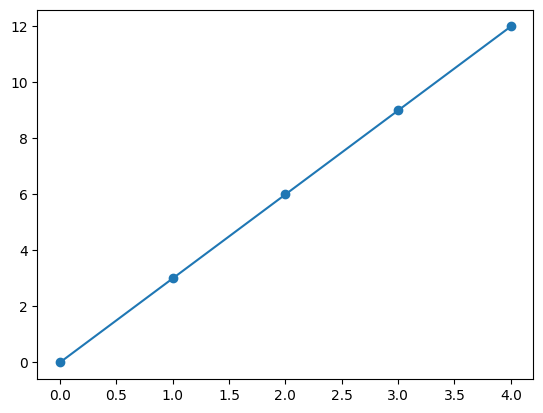

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.03
# 初始化权重w
w = 0
# 设置超参数迭代次数
epochs = 10

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x
        k = 2 * (y_pre - y) * x
        w -= alpha * k
    print("第 {} 次学习结果 {}".format(n*(m + 1), w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

对比第一章的线性误差训练效果,线性误差训练165次才得到极值，而均方误差45次就完全收敛了。

以上学习是针对只有一个参数权重$w$的线性回归模型$y=wx$，下面我们增加参数截距$b$，针对模型$y=wx+b$看看用梯度下降怎么实现。

$$e = (y - (wx+b))^2$$

我们可以**分别以w和b为变量来求导**（这就是偏导数），然后根据导数调整w和b的值。

<div class="alert alert-success">

> 对参数$w$

- $e=x^2w^2+2x(b-y)w+(b-y)^2$；
- $dw=2x^2w+2x(b-y)=2(wx+b-y)x=2(y_{pre}-y)x$；
- $w=w-\alpha\cdot dw$

> 对参数$b$
- $e=b^2+2(xw-y)b+(xw-y)^2$；
- $db=2b+2(xw-y)=2(wx+b-y)=2(y_{pre}-y)$；
- $b=b-\alpha\cdot db$


> 以上公式根据一元二次函数$y=ax^2+bx+c$的导数$y'=2ax+b$来推导，有兴趣的可以自己计算，一点也不难。
</div>

下面基于上以公式，我们来手撸一个机器学习的代码。因为 $y=wx$ 可以理解为 $y=wx+b$ 在 $b=0$ 时的特殊情况，所以我们继续用当前的数据集训练看看：


第 5 次学习结果 w = 2.74847904, b = 1.07572176
第 10 次学习结果 w = 2.7593494809294, b = 0.9697948737540205
第 15 次学习结果 w = 2.781881338262247, b = 0.8792817510103955
第 20 次学习结果 w = 2.8022448271397358, b = 0.7971908157309273
第 25 次学习结果 w = 2.82070748735406, b = 0.7227641321810033
第 30 次学习结果 w = 2.837446449924672, b = 0.6552860117380501
第 35 次学习结果 w = 2.8526226430165127, b = 0.59410772901289
第 40 次学习结果 w = 2.8663819686412286, b = 0.5386411236471489
第 45 次学习结果 w = 2.878856707233568, b = 0.48835294663801354
第 50 次学习结果 w = 2.8901667893692546, b = 0.44275973374483496
第 55 次学习结果 w = 2.9004209487625854, b = 0.40142315752444313
第 60 次学习结果 w = 2.909717767618751, b = 0.36394581330595893
第 65 次学习结果 w = 2.91814662439082, b = 0.329967398592022
第 70 次学习结果 w = 2.925788553053003, b = 0.299161249155668
第 75 次学习结果 w = 2.9327170221511394, b = 0.27123119853133165
第 80 次学习结果 w = 2.9389986411201017, b = 0.24590873070750707
第 85 次学习结果 w = 2.9446938006585697, b = 0.22295039864741778
第 90 次学习结果 w = 2.9498572533176475, b = 0

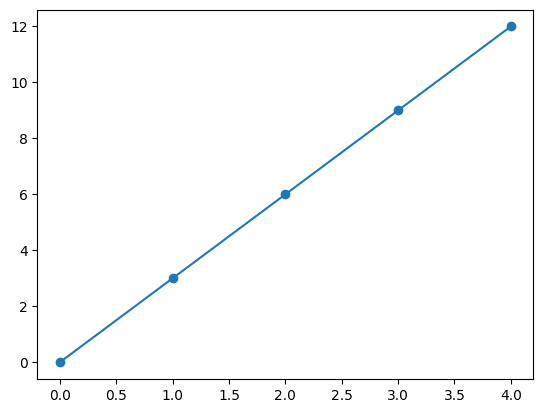

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.03
# 初始化参数权重w和截距b
w = 0
b = 0
# 设置超参数迭代次数
epochs = 50

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x + b
        dw = 2 * (y_pre - y) * x
        db = 2 * (y_pre - y)
        w -= alpha * dw
        b -= alpha * db
    print("第 {} 次学习结果 w = {}, b = {}".format(n*(m + 1), w, b))

y_pre = w * X + b
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

训练结果很不错，和前面只有一个参数时差不多。

在第一节中已经说过，机器学习需要训练的次数除了和设置的超参数有关，最直接的是和数据集的大小有关，数据集太小就得多训练几轮，而数据集很大时可能一轮就够了。

另外，以上代码中每轮训练时把数据集中的所有数据轮了一遍，这个是**批量梯度下降（Batch Gradient Descent, BGD）**，在机器学习中更常用的是**随机梯度下降（Stochastic Gradient Descent, SGD）**，把批量梯度下降改为随机梯度下降也很简单，只需改为每个迭代随机选择一个样本计算对应的参数梯度即可。

### 随机梯度下降 vs 批量梯度下降

随机梯度下降（Stochastic Gradient Descent, SGD）和批量梯度下降（Batch Gradient Descent, BGD）都是常用的优化算法，它们都是用于求解机器学习模型参数的方法，下面是它们的区别：

- 数据处理方式不同：BGD是对整个数据集进行一次完整的梯度计算和参数更新，而SGD是每次从数据集中随机选取一个样本进行梯度计算和参数更新。
- 求解速度不同：SGD适用于数据量较大的情况，因为每次只针对单个样本进行计算和更新，所以速度快；但是BGD是要在整个数据集上进行计算和更新，所以速度相对较慢。同时，SGD的计算误差相对比较大，而BGD的误差比较小。
- 最终解的质量不同：由于SGD在寻找最小值时会不断地跳动，它会在全局最小值附近波动，但是不容易达到全局最小值的区域。所以在SGD中，最终解的质量可能不如BGD好。

综上所述，如果数据量较大，我们可以选用SGD算法，可以在较短时间内求解出较为准确的模型参数；如果数据量较小，可以选用BGD算法，可以获得相对更精确的解。


如下示例改用随机梯度下降，超参数不变，对比结果看看：

w: 2.8955210415118406
b: 0.35117665608263443


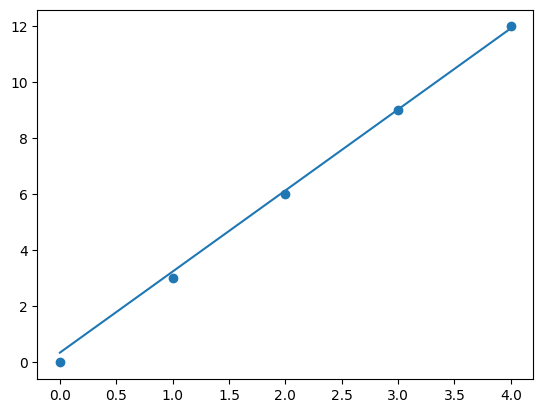

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义随机梯度下降函数
def sgd(X, Y, w, b, learning_rate=0.01, epochs=1000):
    for epoch in range(epochs):
        idx = np.random.randint(len(X)) # 随机选择一个样本
        x, y = X[idx], Y[idx]
        pred_y = w * x + b # 计算模型预测值
        dw = 2 * (pred_y - y) * x # 计算w的导数
        db = 2 * (pred_y - y) # 计算b的导数
        w -= learning_rate * dw # 更新w
        b -= learning_rate * db # 更新b
    return w, b

# 准备数据集
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 初始化模型参数
w = 0
b = 0

# 使用随机梯度下降算法训练模型
w, b = sgd(X, Y, w, b, learning_rate=0.03, epochs=50)

# 打印最优解
print("w:", w)
print("b:", b)

y_pre = w * X + b
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

说明：为了方便新手学习和理解，目前教程的代码写的很简单粗暴，有兴趣的可以自己优化代码，或发给AI优化。

下面为了进一步学习，我们的数据集不再用前面超级简单的几个数值了，对机器学习已经有了基础了解的我们，再用理想数据集反而体验不佳，所以我们使用更多而且更有随机性的数据来训练。

下面的代码中我们用真实模型$y=3x+4$为基础带有随机噪声生成100个值的数据集，但为了方便新同学学习，避免跑出来的结果不一样，这里把随机种子固定保证生成的数据相同。

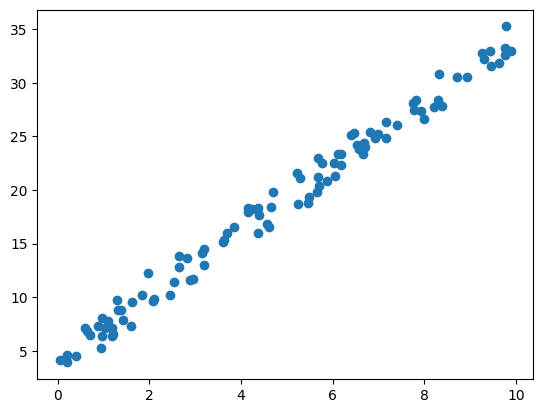

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子，使得每次生成的数据都是相同的
np.random.seed(0)

# 设置数据集的大小
m = 100

# 生成随机的X值
X = 10 * np.random.rand(m, 1)

# 生成随机的噪声项
# noise = 0
noise = np.random.randn(m, 1)

# 定义所需的真实模型
w = 3
b = 4

# 生成Y值
Y = w * X + b + noise

# 创建散点图可视化数据集
plt.scatter(X, Y)

# 显示图像
plt.show()

第 1 轮学习结果 w = [3.16121153], b = [2.09594102]
第 2 轮学习结果 w = [3.0722139], b = [3.00877308]
第 3 轮学习结果 w = [3.01971218], b = [3.54727334]
第 4 轮学习结果 w = [2.98874023], b = [3.86494681]
第 5 轮学习结果 w = [2.97046918], b = [4.05234958]
第 6 轮学习结果 w = [2.95969067], b = [4.1629027]
第 7 轮学习结果 w = [2.95333219], b = [4.22812049]
第 8 轮学习结果 w = [2.94958117], b = [4.26659394]
第 9 轮学习结果 w = [2.94736836], b = [4.28929029]
第 10 轮学习结果 w = [2.94606298], b = [4.30267938]
第 11 轮学习结果 w = [2.9452929], b = [4.31057791]
第 12 轮学习结果 w = [2.94483862], b = [4.31523743]
第 13 轮学习结果 w = [2.94457062], b = [4.31798619]
第 14 轮学习结果 w = [2.94441253], b = [4.31960774]
第 15 轮学习结果 w = [2.94431927], b = [4.32056433]
第 16 轮学习结果 w = [2.94426425], b = [4.32112865]
第 17 轮学习结果 w = [2.94423179], b = [4.32146155]
第 18 轮学习结果 w = [2.94421264], b = [4.32165794]
第 19 轮学习结果 w = [2.94420135], b = [4.32177379]
第 20 轮学习结果 w = [2.94419468], b = [4.32184214]
第 21 轮学习结果 w = [2.94419075], b = [4.32188245]
第 22 轮学习结果 w = [2.94418843], b = [4.32190624]


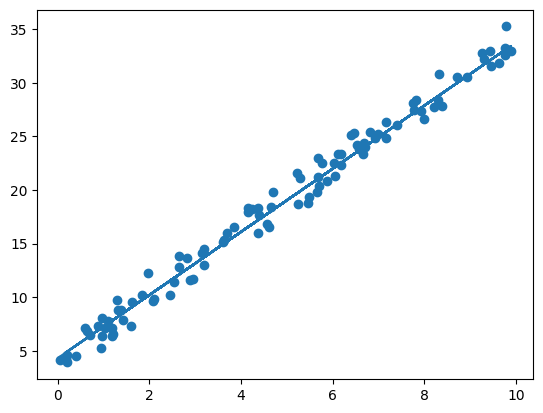

In [8]:
# 设置超参数学习率
alpha = 0.01
# 初始化权重w和截距参数b
w = 0
b = 0
# 设置超参数迭代次数
epochs = 50

for _ in range(epochs):
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_pre = w * x + b
        dw = 2 * (y_pre - y) * x
        db = 2 * (y_pre - y)
        w -= alpha * dw
        b -= alpha * db
    print("第 {} 轮学习结果 w = {}, b = {}".format(_ + 1, w, b))

y_pre = w * X + b
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

数据集有100条数据，学习率设置0.01，学习38轮后已经没有更好的效果了，最终训练的模型为$w=2.94$，$b=4.32$，对比真实模型$y=3x+4$拟合的相当不错。有兴趣的也可以把原始数据集的噪声noise去掉后生成数据集再训练，最终也能训练出和真实模型一样的结果。

这里可以修改代码的超参数测试不同学习率和迭代次数的效果，深入理解这些超参数对训练的影响。比如这个数据把学习率改为0.02就已经效果不佳了，0.04直接发散了。

至此，我们掌握了梯度下降算法的实现，而且模型也从一个参数进化为二个参数，而二个参数的线性回的模型已经可以解决所有简单线性问题的预测了。

但是，新的问题来了，现实问题不只是线性问题，而且我们在生活中更多情况也不是线性类型，比如描述性别只需要男和女，看到一个女孩也只会主观的感受她是漂亮还是普通，而不是给出具体的数值来描述有多漂亮，这些属于分类问题，面对这类问题，在机器学习中应该怎么处理？下一节我们引入激活函数。